# LAB 04.01 - Cleaning Data

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20201.xai4eng/master/content/init.py
import init; init.init(force_download=False); init.get_weblink()

init.endpoint

enabling encryption...
encryption enabled
replicating local resources
endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


'https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc'

In [2]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                session_id="UDEA", 
                                                lab_id="L04.01" )
init.get_weblink()

username: davida.torres@udea.edu.co
password: ··········
endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


observe the following synthetic example with missing data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import numpy as np
import seaborn as sns

In [4]:
n = 20
place = np.r_[["Medellin", "Bogota", "Madrid"]][(np.random.randint(3, size=n))]
age = np.random.randint(50, size=n)+10
children = np.r_[[(np.random.randint(2) if i<30 else (np.random.randint(4))) for i in age]]
risk = np.r_[[np.random.random()*(.2 if i=="Medellin" else .8) for i in place]].round(3)
risk[np.random.permutation(len(risk))[:5]]=np.nan

In [5]:

d01 = pd.DataFrame([age, risk, children, place], index=["age", "risk", "children", "place"]).T
d01.to_csv("risk.csv", index=False)
d01


,age,risk,children,place
0,59,0.096,3,Medellin
1,46,0.118,3,Madrid
2,23,NaN,1,Medellin
3,20,0.056,0,Medellin
4,17,0.703,1,Madrid
5,23,0.237,1,Bogota
6,36,NaN,1,Medellin
7,41,0.537,1,Madrid
8,10,0.015,0,Medellin
9,41,NaN,1,Madrid


observe, in particular, that risk in Medellín is usually lower than in Bogotá, so we will try to fix missing data using this fact.

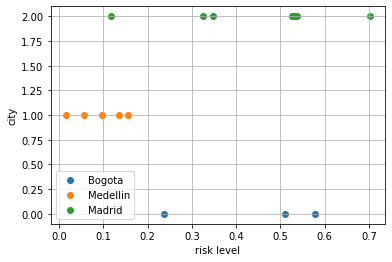

In [6]:

k = d01[d01.place=="Bogota"]["risk"].dropna()
plt.scatter(k, [0]*len(k), label="Bogota")
k = d01[d01.place=="Medellin"]["risk"].dropna()
plt.scatter(k, [1]*len(k), label="Medellin")
k = d01[d01.place=="Madrid"]["risk"].dropna()
plt.scatter(k, [2]*len(k), label="Madrid")
plt.grid();
plt.xlabel("risk level")
plt.ylabel("city")
plt.legend()


## Task 1. FillNA in `risk` with corresponding city average

Observe that the above dataframe has been stored in the file `risk.csv`. You will have to fill in the missing values in the **risk** column with the related city mean in the following way:

1. Download the file `risk.csv`
1. Compute the mean risk **per city** 
1. Substitute any missing value in the risk column by the corresponding city mean
1. Create a new csv file named `risk_fixed.csv`, with the **exact** same structure but with the missing values replaced
1. Upload your `risk_fixed.csv` file to the notebook environment
1. Run the evaluation cell below

### Use the tool of your choice 
(Excel, Orange, your programming language, or even this notebook if you can program python)

**For Python**, you do not have to download and upload anything, just use Pandas and store the resulting dataset in the variable `r01`

**use three decimal places for precision**

### Example
for the following data

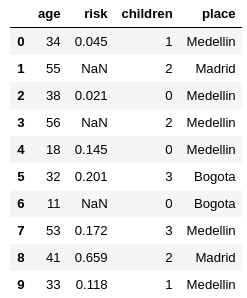

In [7]:
Image("local/imgs/cities.png", width=200)

you must create a file with the following content

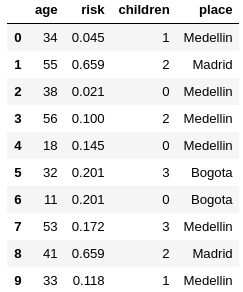

In [8]:
Image("local/imgs/cities-riskfree.png", width=200)

**your solution**

In [9]:
r01 = pd.read_csv("risk_fixed.csv")
r01

FileNotFoundError: ignored

#### submit your answer

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2. Standardize `age` so that min=0, max=1

Standardizing values is, in certain cases, a necesity for ML models, providing stability and increased performance.

In this task you will have to standardize the column `age` so that all values stay in the [0,1] interval. Given any value $x_i$, its corresponsing stardardized value $s_i$ will be:

$$s_i = \frac{s_i-min}{max-min}$$

where $min$, $max$ is the minimum and maximum ages respectively

You must use again the file `risk.csv` and create and upload a file named `age_minmax.csv` with your answer. You should **only modify** the `age` column, leaving the rest as you find them in the csv file.

**For Python**, you do not have to download and upload anything, just use Pandas and store the resulting dataset in the variable `r02`

For the previous example, the correct answer would be

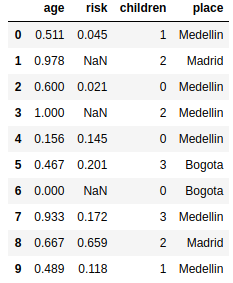

In [10]:
Image("local/imgs/cities-ageminmax.png")

**load your file**

In [ ]:
dd=r01.copy()


dd.age= (dd.age-np.min(dd.age))/(np.max(dd.age)-np.min(dd.age))
dd

In [ ]:
r02 = dd
r02

#### submit your answer

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3. Standardize `age` so that $\mu=0$ and $\sigma=1$


In this task you will have to standardize the column `age` so that all values stay have zero mean and standard deviation of 1. Given any value $x_i$, its corresponsing stardardized value $s_i$ will be:

$$s_i = \frac{s_i-\mu}{\sigma}$$

where $\mu$ is the mean of all age values, and $\sigma$ is the standard deviation.

You must use again the file `risk.csv` and create and upload a file named `age_meanstd.csv` with your answer. You should **only modify** the `age` column, leaving the rest as you find them in the csv file.

**For Python**, you do not have to download and upload anything, just use Pandas and store the resulting dataset in the variable `r03`

For the previous example, the correct answer would be

In [ ]:
Image("local/imgs/cities-agemeanstd.png")

**load your file**

In [ ]:
r3=r01.copy()
r3.age = (r3.age-np.mean(r3.age))/np.std(r3.age)

In [ ]:
r03 = r3
r03

#### submit your answer

In [ ]:
student.submit_task(globals(), task_id="task_03");

## Task 4. Create a one-hot encoding for  `place`

substitute the column `place` for three new columns with **onehot** encoding. You must use again the file `risk.csv` and create and upload a file named `place_onehot.csv` with your answer.

**For Python**, you do not have to download and upload anything, just use Pandas and store the resulting dataset in the variable `r04`

The solution for the example above should look like this. Observe that **you must name the columns** as shown here:

In [ ]:
Image("local/imgs/cities_onehot.png")

In [ ]:
r4=r01.copy()
r4=pd.concat([pd.get_dummies(r4.place, prefix='place'),r4.drop(['place'],axis=1)],axis='columns')
r4

**load your file**

In [ ]:
r04 = r4
r04

#### submit your answer

In [ ]:
student.submit_task(globals(), task_id="task_04");